# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.
Выполнила студентка гр. 0383 Куртова Карина. Вариант №57

## Цель работы
Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения и анализа сетей аффилированности.

## Основные теоретические положения
**Подгруппа** $-$ любое подмножество акторов и все связи между ними.

**Сети аффилированности** $-$ сети, в которой участники аффилированны друг с другом на основе сотрудничества в рамках группы или совместного участия в событии.

**n-клика** $-$ максимальный подграф, в котором наибольшее геодезическое расстояние между любыми двумя узлами $\leqslant n$: $d(i, j) \leqslant n, \forall n_i, n_j, n_j \in N_S$.

**n-клан** $-$ n-клика, в которой геодезическое расстояние $d(i, j)$ между всеми узлами в подграфе не превышает n для путей внутри подграфа.

**n-клуб** $-$ максимальный подграф диаметра $\leqslant n$.

**k-ядро** $-$ максимальный подграф, в котором каждая вершина связана как минимум с k другими вершинами этого же подграфа.

**k-плекс** $-$ максимальный подграф, содержащиё $g_s$ узлов, в котором каждый узел смежен не менее чем с $(g_s - k)$ узлами подграфа: $d_s(i) \geqslant g_s - k, \forall n_i \in N_s$, где $d_s(i) - $ степень узла $n_i$ в подграфе $G$.

**Биграф**, или **двудольный граф** $-$ граф, узлы которого можно разделить на 2 подмножества, а все рёбра соединяют узлы, принадлежащие разным подмножествам.

**Гиперграф** $-$ обобщение понятия графа; гиперграф состоит из множества объектов и множества подмножеств объектов, в котором каждый объект принадлежит хотя бы одному подмножеству, причём ни одно подмножество не является пустым: $H=H(A, B)$.

**Двойственный гиперграф** для гиперграфа $H=H(A, B)$: $H^* = H(B, A)$.

**Одномодальные сети** $-$ сети, акторы которых происходят из одного множества.

**Матрица соучастия акторов** $X^N = \{x_{ij}^N\}$: $\displaystyle{x_{ij}^N=\sum^h_{k=1} a_{ik}a_{jk}, X^N = XX^T}$.

**Матрица перекрытия событий** $X^M = \{x_{kl}^M\}$: $\displaystyle{x_{kl}^M=\sum^g_{k=1} a_{ik}a_{il}, X^M = X^TX}$.

**Степень участия** $-$ количество событий, с которым связан каждый актор: $\displaystyle{a_{i+}=\sum^h_{j=1} a_{ij} = x_{ii}^N}$.

**Среднее количество событий**, с которыми акторы аффилированны: $\displaystyle{\overline{a}_{i+} = \frac{1}{g}\sum^g_{i=1}\sum^h_{j=1}a_{ij}=\frac{a_{++}}{g}}=\frac{1}{g}\sum^g_{i=1}x_{ii}^N$.

**Размер событий**: $\displaystyle{a_{+j} = \sum^g_{i=1} a_{ij} = x_{jj}^M}$.

**Средний размер событий** $-$ среднее количество акторов в каждом событии или средняя степень узлов, представляющих события в двудольном графе: $\displaystyle{\overline{a}_{+j} = \frac{1}{h}\sum^h_{j=1}x_{jj}^M}$.

**Плотность для отношения соучастия** $\Delta_{(N)} = \displaystyle{\frac{1}{g(g-1)}\sum^g_{i=1}\sum^g_{j=1}x_{ij}^N}$.

**Плотность для отношения перекрытия** $\Delta_{(M)} = \displaystyle{\frac{1}{h(h-1)}\sum^h_{k=1}\sum^h_{l=1, l\neq k}x_{kl}^M}$.

**Диаметр аффилированной сети** $-$ длина самого длинного пути между любой парой акторов/событий.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Перед началом работы подключим необходимые библиотеки.

In [ ]:
install.packages("igraph")
library(igraph)
library(statnet)
library(HyperG)
library(RBGL)

**Задание 1.** Извлечём социоматрицу из файла florentine_business.csv и представим полученную сеть с помощью алгоритма укладки Фрюхтермана–Рейнгольда.

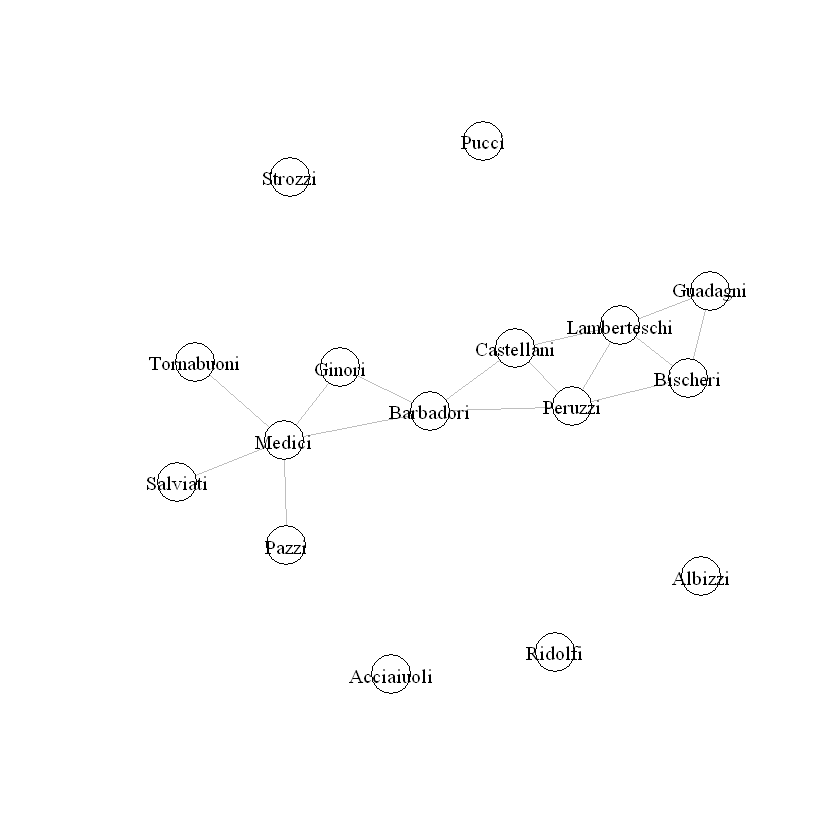

In [2]:
sm_dataframe <- read.table("florentine_business.csv", header = TRUE, sep = ',')
sm <- data.matrix(sm_dataframe)
g <- graph_from_adjacency_matrix(sm, mode = "undirected")
net <-  network(sm, matrix.type = "adjacency")

plot(g, layout = layout_with_fr, 
     vertex.label = V(g)$name,
     vertex.size = 15, 
     edge.arrow.size=.5,
     edge.arrow.color = "grey", 
     vertex.color= "white",
     vertex.label.color = "black", 
     edge.color = "grey")

**Задание 2.** Исследуем данную сеть на предмет подгрупп.

*n-клики*

In [3]:
view_g <- igraph.to.graphNEL(as.undirected(g))
ncliques <- kCliques(view_g)
ncliques

$`1-cliques`
$`1-cliques`[[1]]
[1] "Barbadori"  "Castellani" "Peruzzi"   

$`1-cliques`[[2]]
[1] "Barbadori" "Ginori"    "Medici"   

$`1-cliques`[[3]]
[1] "Bischeri"     "Guadagni"     "Lamberteschi"

$`1-cliques`[[4]]
[1] "Bischeri"     "Lamberteschi" "Peruzzi"     

$`1-cliques`[[5]]
[1] "Castellani"   "Lamberteschi" "Peruzzi"     

$`1-cliques`[[6]]
[1] "Medici" "Pazzi" 

$`1-cliques`[[7]]
[1] "Medici"   "Salviati"

$`1-cliques`[[8]]
[1] "Medici"     "Tornabuoni"


$`2-cliques`
$`2-cliques`[[1]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Lamberteschi" "Peruzzi"     

$`2-cliques`[[2]]
[1] "Barbadori"  "Castellani" "Ginori"     "Medici"     "Peruzzi"   

$`2-cliques`[[3]]
[1] "Bischeri"     "Castellani"   "Guadagni"     "Lamberteschi" "Peruzzi"     

$`2-cliques`[[4]]
[1] "Barbadori"  "Ginori"     "Medici"     "Pazzi"      "Salviati"  
[6] "Tornabuoni"


$`3-cliques`
$`3-cliques`[[1]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Lamberteschi"
[6] "Medici"       "Peruzzi"     

$`3-cliques`[[2]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Guadagni"     "Lamberteschi"
[6] "Peruzzi"     

$`3-cliques`[[3]]
[1] "Barbadori"  "Castellani" "Ginori"     "Medici"     "Pazzi"     
[6] "Peruzzi"    "Salviati"   "Tornabuoni"


$`4-cliques`
$`4-cliques`[[1]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Guadagni"    
[6] "Lamberteschi" "Medici"       "Peruzzi"     

$`4-cliques`[[2]]
 [1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Lamberteschi"
 [6] "Medici"       "Pazzi"        "Peruzzi"      "Salviati"     "Tornabuoni"  


$`5-cliques`
$`5-cliques`[[1]]
 [1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Guadagni"    
 [6] "Lamberteschi" "Medici"       "Pazzi"        "Peruzzi"      "Salviati"    
[11] "Tornabuoni"

*n-кланы*

In [4]:
nclan <- function(g,n){
  ncliques <- kCliques(ugraph(igraph.to.graphNEL(g)))
  n.cand <- ncliques[[n]]
  n.clan <- list()
  n.clan.i <- 1
  for (n.cand.i in 1:length(n.cand)) {
    g.n.cand <- induced_subgraph(g,n.cand[[n.cand.i]])
    if (diameter(g.n.cand)<=n){
      n.clan[[n.clan.i]] <- n.cand[[n.cand.i]]
      n.clan.i <- n.clan.i+1
    }
  }
  return(n.clan)
}

cat("1\n")
print(nclan(g, 1))
cat("2\n")
print(nclan(g, 2))
cat("3\n")
print(nclan(g, 3))
cat("4\n")
print(nclan(g, 4))
cat("5\n")
print(nclan(g, 5))

1
[[1]]
[1] "Barbadori"  "Castellani" "Peruzzi"   

[[2]]
[1] "Barbadori" "Ginori"    "Medici"   

[[3]]
[1] "Bischeri"     "Guadagni"     "Lamberteschi"

[[4]]
[1] "Bischeri"     "Lamberteschi" "Peruzzi"     

[[5]]
[1] "Castellani"   "Lamberteschi" "Peruzzi"     

[[6]]
[1] "Medici" "Pazzi" 

[[7]]
[1] "Medici"   "Salviati"

[[8]]
[1] "Medici"     "Tornabuoni"

2
[[1]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Lamberteschi" "Peruzzi"     

[[2]]
[1] "Barbadori"  "Castellani" "Ginori"     "Medici"     "Peruzzi"   

[[3]]
[1] "Bischeri"     "Castellani"   "Guadagni"     "Lamberteschi" "Peruzzi"     

[[4]]
[1] "Barbadori"  "Ginori"     "Medici"     "Pazzi"      "Salviati"  
[6] "Tornabuoni"

3
[[1]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Lamberteschi"
[6] "Medici"       "Peruzzi"     

[[2]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Guadagni"     "Lamberteschi"
[6] "Peruzzi"     

[[3]]
[1] "Barbadori"  "Castellani" "Ginori"     "Medici"     "P

*k-ядра*

In [5]:
info <- coreness(g, mode= "all")
res <-lapply(1:max(as.integer(info)), function(x) names(info)[which(as.integer(info) >= x)])
names(res) <- sapply(1:length(res), function(x) paste(x,"kernel",sep= "-"))
res

$`1-kernel`
 [1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Guadagni"    
 [6] "Lamberteschi" "Medici"       "Pazzi"        "Peruzzi"      "Salviati"    
[11] "Tornabuoni"  

$`2-kernel`
[1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Guadagni"    
[6] "Lamberteschi" "Medici"       "Peruzzi"

*k-плексы*

In [6]:
kplexes <- function(g) {
    result <- c()
    for (i in 2:(length(V(g)))) {
        for (j in 1:(i-1)) {
            plex <- kplex(g, j, i)
            if(length(plex) > 0) {
                result[[paste(toString(i), toString(j), "plex", sep="_")]] <- plex
            }
        }
    }
    return(result)
}

kplex <- function(g,k,m){
    g.sym <- as.undirected(g)
    k.plex <- list()
    g.sym.degmk <- induced_subgraph(g.sym,igraph::degree(g.sym)>=(m-k))
    if(length(V(g.sym.degmk)) < m) {
        return(k.plex)
    } 
    k.cand <- combn(V(g.sym.degmk)$name,m)
    k.plex <- list() 
    k.plex.i <- 1 
    for (k.cand.i in 1:dim(k.cand)[2]){ 
        g.k.cand <- induced_subgraph(g.sym.degmk,k.cand[,k.cand.i]) 
        if (min(igraph::degree(g.k.cand))>=(m-k)){
            k.plex[[k.plex.i]] <- k.cand[,k.cand.i] 
            k.plex.i <- k.plex.i+1 
        }
    }
    return(k.plex)
}

kplexes(g)

$`2_1_plex`
$`2_1_plex`[[1]]
[1] "Barbadori"  "Castellani"

$`2_1_plex`[[2]]
[1] "Barbadori" "Ginori"   

$`2_1_plex`[[3]]
[1] "Barbadori" "Medici"   

$`2_1_plex`[[4]]
[1] "Barbadori" "Peruzzi"  

$`2_1_plex`[[5]]
[1] "Bischeri" "Guadagni"

$`2_1_plex`[[6]]
[1] "Bischeri"     "Lamberteschi"

$`2_1_plex`[[7]]
[1] "Bischeri" "Peruzzi" 

$`2_1_plex`[[8]]
[1] "Castellani"   "Lamberteschi"

$`2_1_plex`[[9]]
[1] "Castellani" "Peruzzi"   

$`2_1_plex`[[10]]
[1] "Ginori" "Medici"

$`2_1_plex`[[11]]
[1] "Guadagni"     "Lamberteschi"

$`2_1_plex`[[12]]
[1] "Lamberteschi" "Peruzzi"     

$`2_1_plex`[[13]]
[1] "Medici" "Pazzi" 

$`2_1_plex`[[14]]
[1] "Medici"   "Salviati"

$`2_1_plex`[[15]]
[1] "Medici"     "Tornabuoni"


$`3_1_plex`
$`3_1_plex`[[1]]
[1] "Barbadori"  "Castellani" "Peruzzi"   

$`3_1_plex`[[2]]
[1] "Barbadori" "Ginori"    "Medici"   

$`3_1_plex`[[3]]
[1] "Bischeri"     "Guadagni"     "Lamberteschi"

$`3_1_plex`[[4]]
[1] "Bischeri"     "Lamberteschi" "Peruzzi"     

$`3_1_plex`[[5]]
[1] "Castellani"   "Lamberteschi" "Peruzzi"     


$`3_2_plex`
$`3_2_plex`[[1]]
[1] "Barbadori" "Bischeri"  "Peruzzi"  

$`3_2_plex`[[2]]
[1] "Barbadori"  "Castellani" "Ginori"    

$`3_2_plex`[[3]]
[1] "Barbadori"    "Castellani"   "Lamberteschi"

$`3_2_plex`[[4]]
[1] "Barbadori"  "Castellani" "Medici"    

$`3_2_plex`[[5]]
[1] "Barbadori"  "Castellani" "Peruzzi"   

$`3_2_plex`[[6]]
[1] "Barbadori" "Ginori"    "Medici"   

$`3_2_plex`[[7]]
[1] "Barbadori" "Ginori"    "Peruzzi"  

$`3_2_plex`[[8]]
[1] "Barbadori"    "Lamberteschi" "Peruzzi"     

$`3_2_plex`[[9]]
[1] "Barbadori" "Medici"    "Pazzi"    

$`3_2_plex`[[10]]
[1] "Barbadori" "Medici"    "Peruzzi"  

$`3_2_plex`[[11]]
[1] "Barbadori" "Medici"    "Salviati" 

$`3_2_plex`[[12]]
[1] "Barbadori"  "Medici"     "Tornabuoni"

$`3_2_plex`[[13]]
[1] "Bischeri"     "Castellani"   "Lamberteschi"

$`3_2_plex`[[14]]
[1] "Bischeri"   "Castellani" "Peruzzi"   

$`3_2_plex`[[15]]
[1] "Bischeri"     "Guadagni"     "Lamberteschi"

$`3_2_plex`[[16]]
[1] "Bischeri" "Guadagni" "Peruzzi" 

$`3_2_plex`[[17]]
[1] "Bischeri"     "Lamberteschi" "Peruzzi"     

$`3_2_plex`[[18]]
[1] "Castellani"   "Guadagni"     "Lamberteschi"

$`3_2_plex`[[19]]
[1] "Castellani"   "Lamberteschi" "Peruzzi"     

$`3_2_plex`[[20]]
[1] "Ginori" "Medici" "Pazzi" 

$`3_2_plex`[[21]]
[1] "Ginori"   "Medici"   "Salviati"

$`3_2_plex`[[22]]
[1] "Ginori"     "Medici"     "Tornabuoni"

$`3_2_plex`[[23]]
[1] "Guadagni"     "Lamberteschi" "Peruzzi"     

$`3_2_plex`[[24]]
[1] "Medici"   "Pazzi"    "Salviati"

$`3_2_plex`[[25]]
[1] "Medici"     "Pazzi"      "Tornabuoni"

$`3_2_plex`[[26]]
[1] "Medici"     "Salviati"   "Tornabuoni"


$`4_2_plex`
$`4_2_plex`[[1]]
[1] "Barbadori"    "Castellani"   "Lamberteschi" "Peruzzi"     

$`4_2_plex`[[2]]
[1] "Bischeri"     "Castellani"   "Lamberteschi" "Peruzzi"     

$`4_2_plex`[[3]]
[1] "Bischeri"     "Guadagni"     "Lamberteschi" "Peruzzi"     


$`4_3_plex`
$`4_3_plex`[[1]]
[1] "Barbadori"  "Bischeri"   "Castellani" "Guadagni"  

$`4_3_plex`[[2]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Lamberteschi"

$`4_3_plex`[[3]]
[1] "Barbadori"  "Bischeri"   "Castellani" "Peruzzi"   

$`4_3_plex`[[4]]
[1] "Barbadori" "Bischeri"  "Ginori"    "Guadagni" 

$`4_3_plex`[[5]]
[1] "Barbadori"    "Bischeri"     "Ginori"       "Lamberteschi"

$`4_3_plex`[[6]]
[1] "Barbadori" "Bischeri"  "Ginori"    "Peruzzi"  

$`4_3_plex`[[7]]
[1] "Barbadori" "Bischeri"  "Guadagni"  "Medici"   

$`4_3_plex`[[8]]
[1] "Barbadori" "Bischeri"  "Guadagni"  "Peruzzi"  

$`4_3_plex`[[9]]
[1] "Barbadori"    "Bischeri"     "Lamberteschi" "Medici"      

$`4_3_plex`[[10]]
[1] "Barbadori"    "Bischeri"     "Lamberteschi" "Peruzzi"     

$`4_3_plex`[[11]]
[1] "Barbadori" "Bischeri"  "Medici"    "Peruzzi"  

$`4_3_plex`[[12]]
[1] "Barbadori"    "Castellani"   "Ginori"       "Lamberteschi"

$`4_3_plex`[[13]]
[1] "Barbadori"  "Castellani" "Ginori"     "Medici"    

$`4_3_plex`[[14]]
[1] "Barbadori"  "Castellani" "Ginori"     "Peruzzi"   

**Задание 3.** Исследуем алгоритмы обнаружения сообществ (вариант 1).

*Edge-betweenness*

Показатель edge_betweenneess для рёбер измеряет количество кратчайших путей через это ребро. Постепенно удаляя ребра с наибольшим показателем e.b., получим иерархическое представление графа - дендрограмму. Листья дендрограммы - отдельные вершины, корень представляет собой весь граф.

*Leading eigenvector*

Метод главного собственного вектора считает модулярность матрицы для наибольшего положительного собственного числа и разделяет вершины на две группы, основываясь на знаках элементов в совственном векторе.

[1] 0.3111111

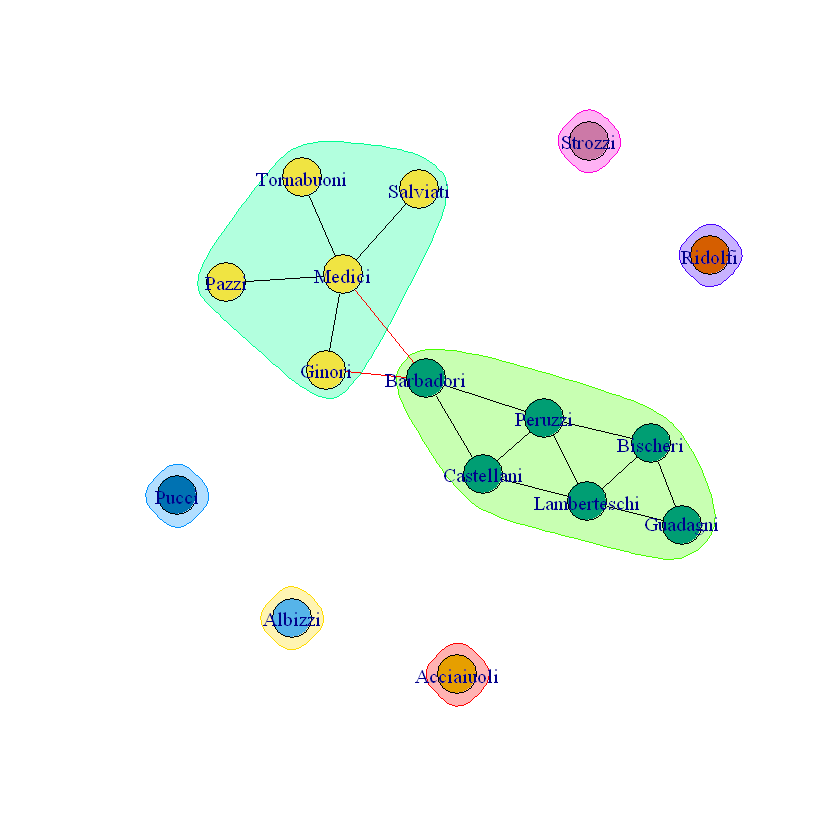

In [7]:
eb <- cluster_edge_betweenness(g)
modularity(eb)
plot(eb, g)

[1] 0.3644444

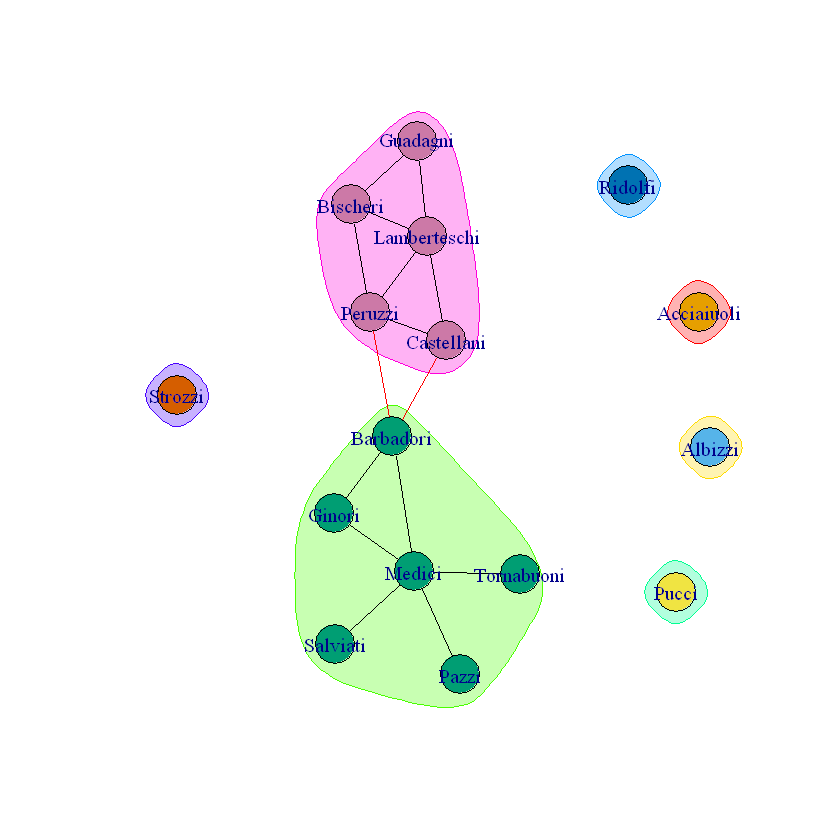

In [8]:
le <- cluster_leading_eigen(g)
modularity(le)
plot(le, g)

[1] 0.3644444

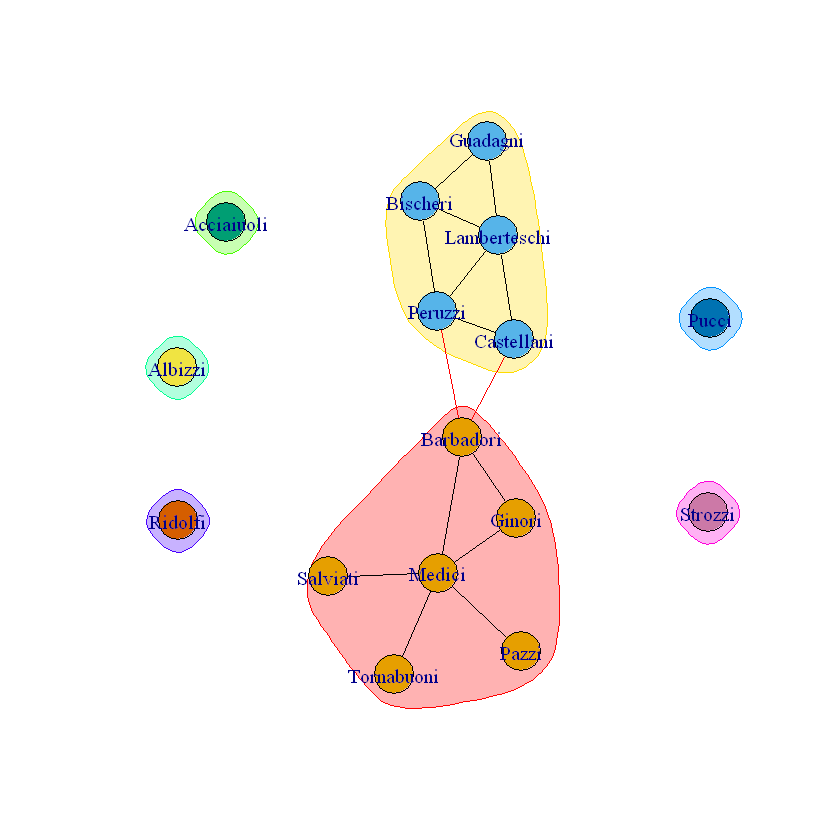

In [9]:
fg <- cluster_fast_greedy(g)
modularity(fg)
plot(fg, g)

**Задание 4**. Извлечём матрицу инцидентности из файла ceo.csv. Пусть цифрами будут обозначены акторы, буквами будут представлены события.

In [10]:
ceo_dataframe <- read.csv("ceo.csv", header = F, skip = 9)
colnames(ceo_dataframe) <- letters[1:15]
rownames(ceo_dataframe) <- c(1:26)
ceo <- data.matrix(ceo_dataframe)
ceo_g <- graph_from_incidence_matrix(ceo)
ceo

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
6,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
8,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
9,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
10,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


**Задание 5.** Отобразим сеть в виде биграфа.

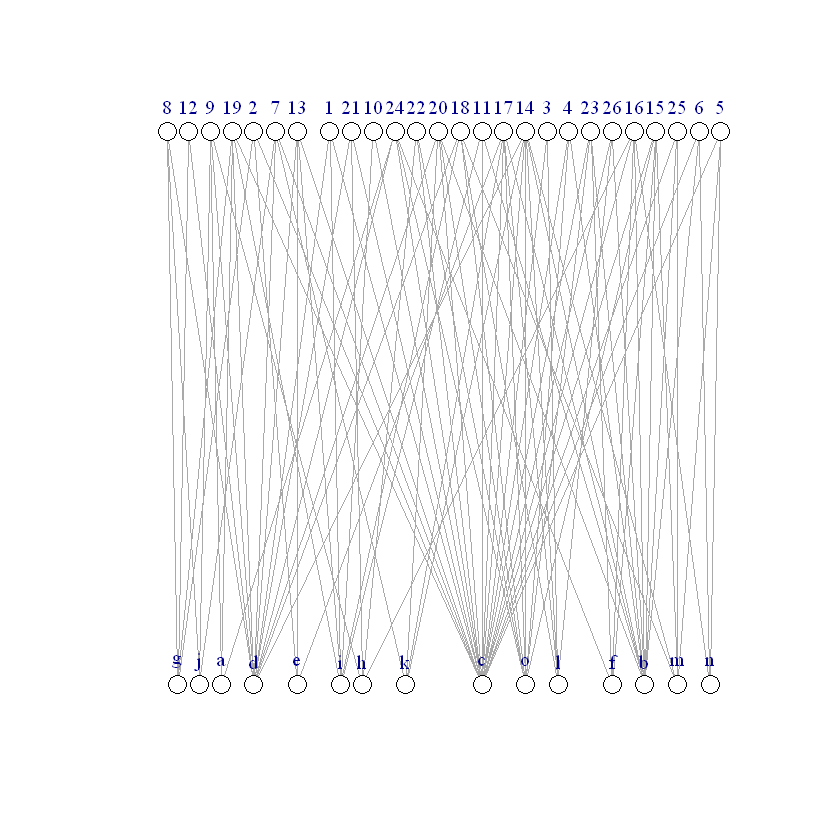

In [11]:
plot(ceo_g, layout = layout_as_bipartite,
     vertex.size = 7,
     vertex.label.degree = -pi/2, 
     vertex.label.dist = 1.2,
     vertex.label.cex = 1,
     vertex.color=c("green","cyan")[V(g)$type+1])

**Задание 6.** Отобразим сеть в виде гиперграфа с помощью пакета HyperG.

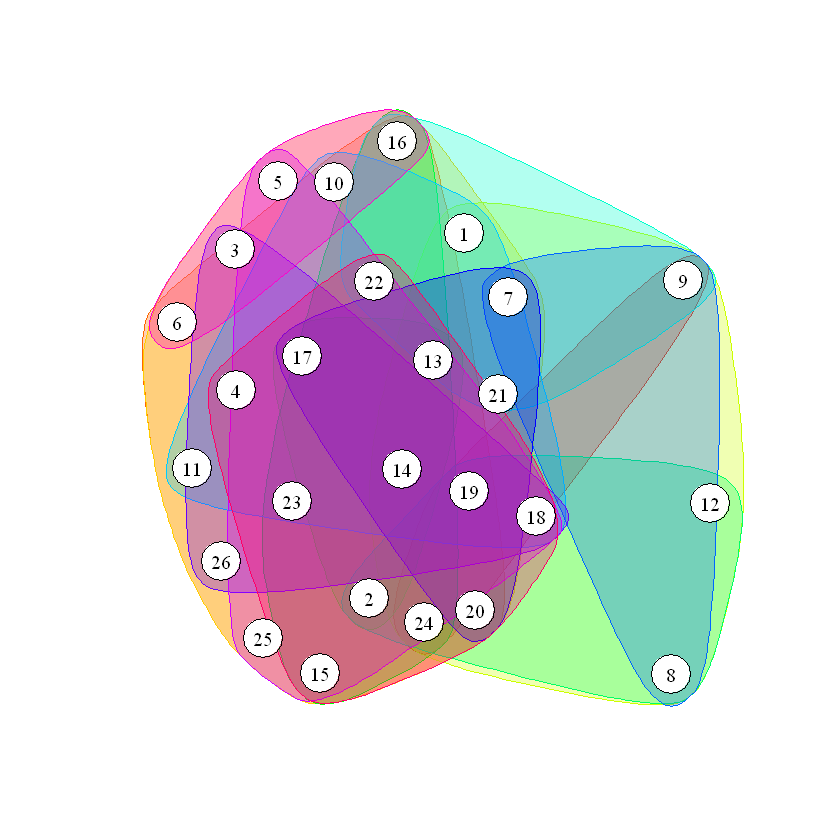

In [12]:
ceo_t <- t(ceo) 
h1 <- hypergraph_from_incidence_matrix(ceo_t)
plot(h1,
     vertex.color = "white",
     vertex.label.color = "black")

Отобразим сеть в виде двойственного гиперграфа.

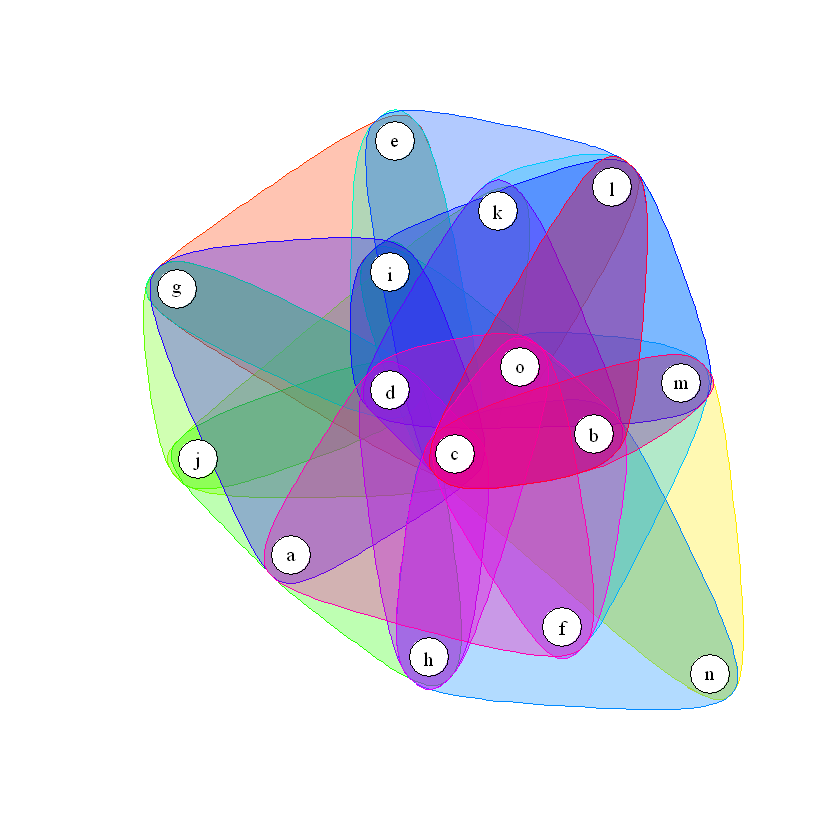

In [13]:
h2 <- hypergraph_from_incidence_matrix(ceo)
plot(h2,
     vertex.color = "white",
     vertex.label.color = "black")

**Задание 7.** Представим сеть аффилированости в виде двух одномодальных сетей. 

Сначала построим матрицу соучастия акторов и по ней отобразим одномодальную сеть.

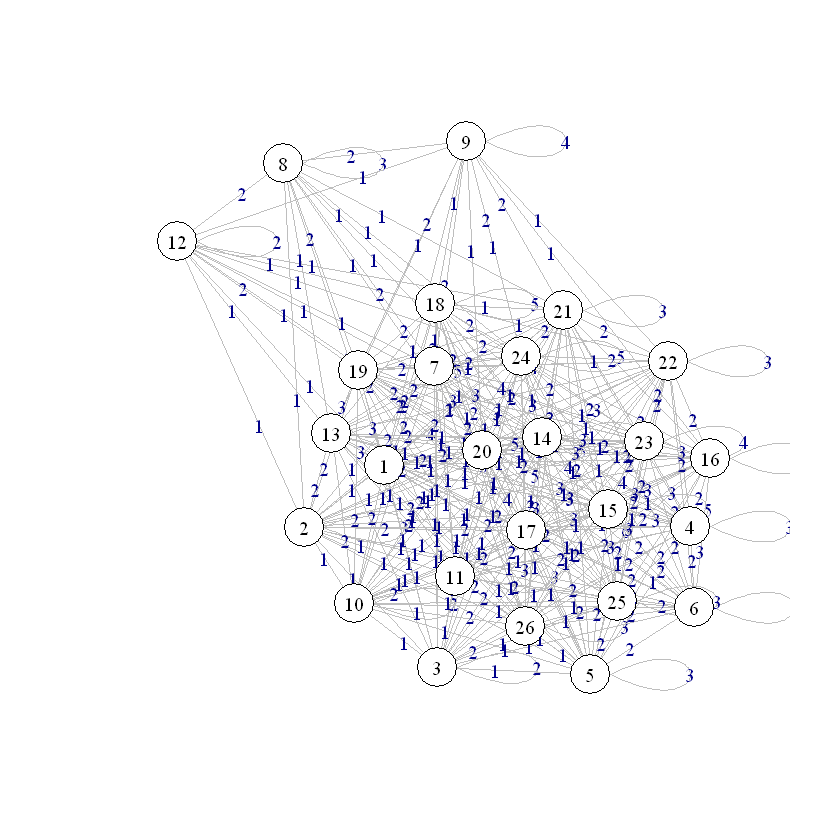

In [14]:
comembership_m <- tcrossprod(ceo)
comembership_g <- graph.adjacency(comembership_m, mode = 'undirected', weighted = T)

plot(comembership_g, layout = layout_with_fr,
     vertex.label = V(comembership_g)$name,
     vertex.size = 15, 
     edge.arrow.size=.5,
     edge.arrow.color = "grey",
     edge.label = E(comembership_g)$weight,
     vertex.color = "white",
     vertex.label.color = "black", 
     edge.color = "grey")

Построим матрицу перекрытия событий и по ней отобразим одномодальную сеть.

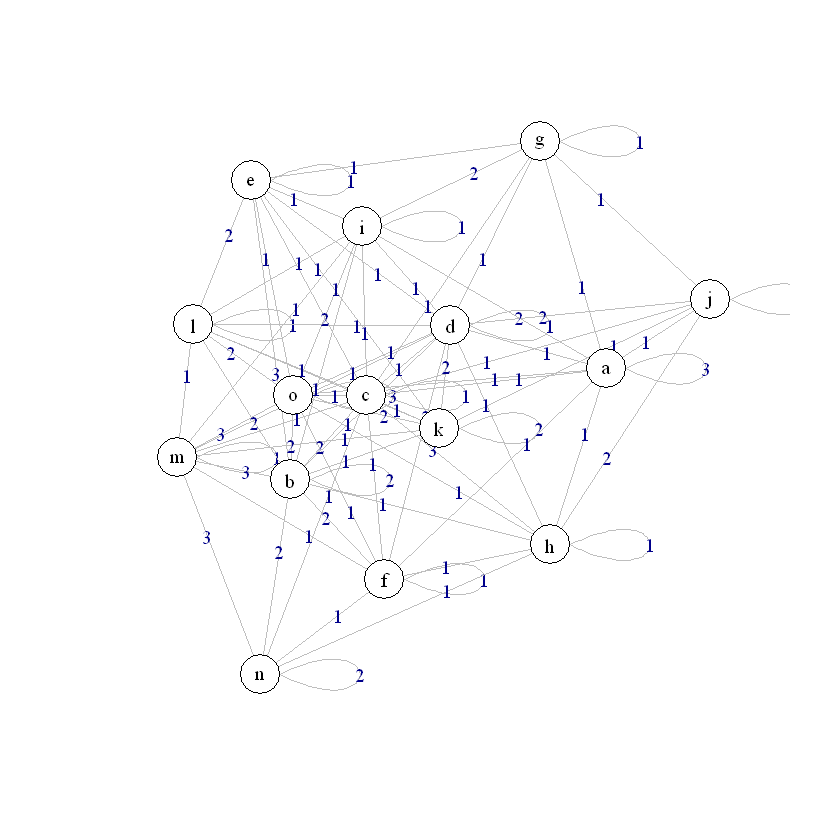

In [15]:
overlap_m <- t(ceo) %*% ceo
overlap_g <- graph.adjacency(overlap_m, mode = 'undirected', weighted = T)

plot(overlap_g, layout = layout_with_fr,
     vertex.label = V(overlap_g)$name,
     vertex.size = 15, 
     edge.arrow.size=.5,
     edge.arrow.color = "grey",
     edge.label = E(comembership_g)$weight,
     vertex.color= "white",
     vertex.label.color = "black", 
     edge.color = "grey")

Видим, что каждый из акторов в общем случае участвует в одом событии хотя бы с одним другим актором. Наибольшее количество участников имеет событие c.

**Задание 8.** Вычислим степень участия для каждого актора и среднее количество событий, с которыми каждый актор аффилирован.

In [16]:
h <- ncol(ceo)
g <- nrow(ceo)
part_degree <- rowSums(ceo)
avg_part_degree <- sum(part_degree)/g
part_df <- data.frame(part_degree)
part_df
avg_part_degree

,part_degree
,<dbl>
1,3
2,3
3,2
4,3
5,3
6,3
7,4
8,3
9,4


[1] 3.769231

Из этого можно сделать вывод, что каждый актор связан в среднем с 3.8 событиями, что достаточно немного по сравнению с общим количеством событий.

**Задание 9.** Вычислим размер и средний зазмер каждого события.

In [17]:
event_degree <- colSums(ceo)
avg_event_degree <- sum(event_degree)/h
event_df <- data.frame(event_degree)
event_df
avg_event_degree

,event_degree
,<dbl>
a,3
b,11
c,22
d,12
e,3
f,4
g,4
h,4
i,6


[1] 6.533333

Можно сделать вывод, что в каждом событии участвует в среднем 6.5 акторов, что в 4 раза меньше, чем общее количество акторов. 

**Задание 10.** Вычислим плотности для отношения участия и перекрытия. 

In [18]:
h <- ncol(ceo)
g <- nrow(ceo)
comembership_density  <- (sum(comembership_m) - sum(diag(comembership_m)))/(g*(g - 1))
overlap_density <- (sum(overlap_m) - sum(diag(overlap_m)))/(h*(h - 1))
cat("Плотность для отношения соучастия:", comembership_density, "\n")
cat("Плотность для отношения перекрытия:", overlap_density)

Плотность для отношения соучастия: 1.412308 
Плотность для отношения перекрытия: 1.485714

Видим, что плотности незначительно отличаются друг от друга. По сравнению с общим числом акторов и событий, данные значения невелики.

**Задание 11.** Вычислим диаметр сети аффилированности.

In [19]:
diameter(ceo_g)

[1] 5

**Задание 12.** Определим клики уровня 𝑐 = {4, 3} для отношения соучастия и клики уровня 𝑐 = {6, 5, 4, 3, 2} для отношения перекрытия событий.

In [20]:
cat("1\n")
temp <- delete_edges(comembership_g,  E(comembership_g)[E(comembership_g)$weight < 3])
max_cliques(temp, min = 3)
cat("2\n")
temp <- delete_edges(comembership_g,  E(comembership_g)[E(comembership_g)$weight < 3])
max_cliques(temp, min = 3)

1


[[1]]
+ 3/26 vertices, named, from 5a25acc:
[1] 1  13 19

[[2]]
+ 3/26 vertices, named, from 5a25acc:
[1] 7  14 20

[[3]]
+ 3/26 vertices, named, from 5a25acc:
[1] 16 15 23

[[4]]
+ 3/26 vertices, named, from 5a25acc:
[1] 25 14 15

[[5]]
+ 3/26 vertices, named, from 5a25acc:
[1] 26 14 17

[[6]]
+ 5/26 vertices, named, from 5a25acc:
[1] 24 14 23 20 15

[[7]]
+ 6/26 vertices, named, from 5a25acc:
[1] 14 4  23 20 17 15


2


[[1]]
+ 3/26 vertices, named, from 5a27a4c:
[1] 1  13 19

[[2]]
+ 3/26 vertices, named, from 5a27a4c:
[1] 7  14 20

[[3]]
+ 3/26 vertices, named, from 5a27a4c:
[1] 16 15 23

[[4]]
+ 3/26 vertices, named, from 5a27a4c:
[1] 25 14 15

[[5]]
+ 3/26 vertices, named, from 5a27a4c:
[1] 26 14 17

[[6]]
+ 5/26 vertices, named, from 5a27a4c:
[1] 24 14 23 20 15

[[7]]
+ 6/26 vertices, named, from 5a27a4c:
[1] 14 4  23 20 17 15


In [21]:
cat("1\n")
temp <- delete_edges(overlap_g,  E(overlap_g)[E(overlap_g)$weight < 3])
max_cliques(temp, min = 3)
cat("2\n")
temp <- delete_edges(overlap_g,  E(overlap_g)[E(overlap_g)$weight < 4])
max_cliques(temp, min = 3)
cat("3\n")
temp <- delete_edges(overlap_g,  E(overlap_g)[E(overlap_g)$weight < 5])
max_cliques(temp, min = 3)
cat("4\n")
temp <- delete_edges(overlap_g,  E(overlap_g)[E(overlap_g)$weight < 6])
max_cliques(temp, min = 3)

1


[[1]]
+ 3/15 vertices, named, from 5a2f98e:
[1] i c d

[[2]]
+ 4/15 vertices, named, from 5a2f98e:
[1] m b o c

[[3]]
+ 4/15 vertices, named, from 5a2f98e:
[1] o c b f

[[4]]
+ 4/15 vertices, named, from 5a2f98e:
[1] o c b k

[[5]]
+ 4/15 vertices, named, from 5a2f98e:
[1] o c b l

[[6]]
+ 4/15 vertices, named, from 5a2f98e:
[1] o c d k


2


[[1]]
+ 3/15 vertices, named, from 5a316d6:
[1] o c b

[[2]]
+ 3/15 vertices, named, from 5a316d6:
[1] o c d

[[3]]
+ 3/15 vertices, named, from 5a316d6:
[1] d c i


3


[[1]]
+ 3/15 vertices, named, from 5a3307e:
[1] b c o


4


[[1]]
+ 3/15 vertices, named, from 5a348d0:
[1] b c o


**Задание 13.** Определим отношение шансов.

In [22]:
kl <- t(ceo) %*% ceo
nkl <- (1 - t(ceo)) %*% (1 - ceo)
nk_l <- (1 - t(ceo)) %*% ceo
k_nl <- t(ceo) %*% (1 - ceo)
  
res <- c()
for(i in 2:nrow(kl)){
   for(j in 1:(i - 1)){
       theta = (kl[i,j] * nkl[i,j])/(nk_l[i,j] * k_nl[i,j])
     cat("(", i,", ",j,") = ", theta, "\n")
   }
}

( 2 ,  1 ) =  0 
( 3 ,  1 ) =  0.3 
( 3 ,  2 ) =  Inf 
( 4 ,  1 ) =  Inf 
( 4 ,  2 ) =  0.1111111 
( 4 ,  3 ) =  0 
( 5 ,  1 ) =  0 
( 5 ,  2 ) =  0.65 
( 5 ,  3 ) =  Inf 
( 5 ,  4 ) =  0.5454545 
( 6 ,  1 ) =  3.333333 
( 6 ,  2 ) =  5.25 
( 6 ,  3 ) =  Inf 
( 6 ,  4 ) =  0.3333333 
( 6 ,  5 ) =  0 
( 7 ,  1 ) =  3.333333 
( 7 ,  2 ) =  0 
( 7 ,  3 ) =  0.1 
( 7 ,  4 ) =  4.333333 
( 7 ,  5 ) =  3.333333 
( 7 ,  6 ) =  0 
( 8 ,  1 ) =  3.333333 
( 8 ,  2 ) =  0.4 
( 8 ,  3 ) =  0.4736842 
( 8 ,  4 ) =  1.2 
( 8 ,  5 ) =  0 
( 8 ,  6 ) =  2.111111 
( 8 ,  7 ) =  0 
( 9 ,  1 ) =  1.8 
( 9 ,  2 ) =  0.2 
( 9 ,  3 ) =  0.8823529 
( 9 ,  4 ) =  3 
( 9 ,  5 ) =  1.8 
( 9 ,  6 ) =  0 
( 9 ,  7 ) =  1.133333 
( 9 ,  8 ) =  0 
( 10 ,  1 ) =  5.25 
( 10 ,  2 ) =  0 
( 10 ,  3 ) =  0.04761905 
( 10 ,  4 ) =  Inf 
( 10 ,  5 ) =  0 
( 10 ,  6 ) =  0 
( 10 ,  7 ) =  3.333333 
( 10 ,  8 ) =  3.333333 
( 10 ,  9 ) =  0 
( 11 ,  1 ) =  0 
( 11 ,  2 ) =  5.25 
( 11 ,  3 ) =  Inf 
( 11 ,  4 ) =  4.33333

Видим, что пояляется много нулевых значений и значений, равных бесконечности. Нули означают, что существуют события без общих участников. Бесконечные значения говорят о том, что актор, который является участником одного из событий группы, обязательно является участником сторого события в данной паре.

## Выводы

В ходе работы реализовали функции для разбиения графы на подграфы. Изучили сети аффилированности и их свойства.